Decison Tree Model using cross validation
Target variables is Severity ( non- severe == 0 and severe == 1) 
Target created from 'grav'

data for trainning from 2005 to 2018
test from 2019 to 2021

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Following the observations made in the previous step, you will have to clean your dataset and perform the pre-processing steps.
#If necessary, you will have to transform and/or add features and enrich your dataset.
#The objective at the end of this step is to have a dataset ready to perform in-depth analysis and/or modeling using Randon Forest Classifier 

In [2]:
#new data cleaned file to load
df = pd.read_csv("./data/231018_clean_table_for_analysis.csv", index_col=0, low_memory=False)

In [3]:
df.head()

,place,catu,sexe,an_nais,trajet,locp,an,mois,jour,lum,...,choc,manv,date,is_holiday,holiday,actp,num_veh,hrmn,grav,etatp
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,2.0,2,2,2002,0.0,-1.0,2019,11,30,4,...,5.0,23.0,2019-11-30,False,NaN,0,14,90,3,0
201900000001,1.0,1,2,1993,5.0,-1.0,2019,11,30,4,...,5.0,23.0,2019-11-30,False,NaN,0,14,90,3,0
201900000001,1.0,1,1,1959,0.0,-1.0,2019,11,30,4,...,3.0,11.0,2019-11-30,False,NaN,0,0,90,0,0
201900000002,1.0,1,2,1994,0.0,-1.0,2019,11,30,3,...,1.0,0.0,2019-11-30,False,NaN,0,0,170,3,0
201900000003,1.0,1,1,1996,0.0,-1.0,2019,11,28,1,...,1.0,2.0,2019-11-28,False,NaN,1,0,915,0,0


In [4]:
df.isna().sum()


place               0
catu                0
sexe                0
an_nais             0
trajet              0
locp                0
an                  0
mois                0
jour                0
lum                 0
agg                 0
int                 0
atm                 0
col                 0
dep                 0
catr                0
circ                0
nbv                 0
vosp                0
prof                0
plan                0
surf                0
infra               0
situ                0
senc                0
catv                0
occutc              0
obs                 0
obsm                0
choc                0
manv                0
date                0
is_holiday          0
holiday       2367768
actp                0
num_veh             0
hrmn                0
grav                0
etatp               0
dtype: int64

In [5]:
df.shape

(2421684, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 39 columns):
 #   Column      Dtype  
---  ------      -----  
 0   place       float64
 1   catu        int64  
 2   sexe        int64  
 3   an_nais     int64  
 4   trajet      float64
 5   locp        float64
 6   an          int64  
 7   mois        int64  
 8   jour        int64  
 9   lum         int64  
 10  agg         int64  
 11  int         int64  
 12  atm         float64
 13  col         float64
 14  dep         int64  
 15  catr        float64
 16  circ        float64
 17  nbv         float64
 18  vosp        float64
 19  prof        float64
 20  plan        float64
 21  surf        float64
 22  infra       float64
 23  situ        float64
 24  senc        float64
 25  catv        int64  
 26  occutc      float64
 27  obs         float64
 28  obsm        float64
 29  choc        float64
 30  manv        float64
 31  date        object 
 32  is_holiday  bool   
 

In [7]:
df['grav'].unique()

array([3, 0, 1, 2])

In [8]:
import numpy as np
# create target variable
# create a new variable for the severity ['Grav'] of accidents ( Sereve, non-severe) as a possible target variable
#### zero = non severe and one equal to severe
#df['Severe'] = np.where(df['grav'].isin([1, 2]), 0, 1)

### this should be the righ one  to run
df['Severe'] = np.where(df['grav'].isin([0, 1]), 0, 1)


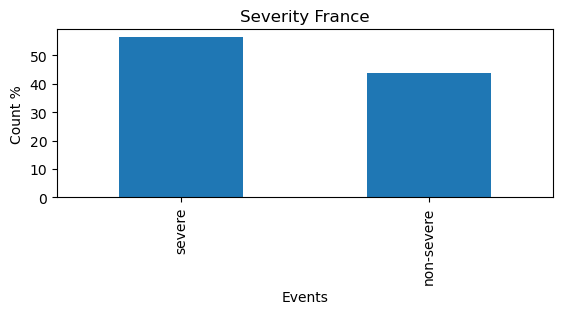

In [9]:
# test with target vaibale is balanced 
import matplotlib.pyplot as plt
# exploring severe cases in % 
event_counts = df['Severe'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['severe','non-severe']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

In [10]:
severe_accidents_catr_1 = df[df['catr'] == 1]['grav'].value_counts().get(1, 0)
print("Number of severe accidents in category 1 of 'catr':", severe_accidents_catr_1)

Number of severe accidents in category 1 of 'catr': 4612


In [11]:
# cleanning variables that might not be used in the model
df['date']= pd.to_datetime(df.date,format='%Y-%m-%d')
df['year'] = df['date'].dt.year.astype(int)



In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['actp'] = le.fit_transform(df['actp'].astype(str))
df['hrmn'] = le.fit_transform(df['hrmn'].astype(str))
df['date'] = le.fit_transform(df['date'].astype(str))

In [16]:
#cleanning variables that might not be used in the model
# grav removed because is similat to target 
df_dt = df.drop(['holiday', 'grav'], axis=1)

In [18]:
#split the data for modeling
# 2005 to 2019 for trainning  and 2020 to 2021 to test

# Filter data for the training period (2005-2018)
train_data = df_dt[(df_dt['an'] >= 2005) & (df_dt['an'] <= 2018)]

# Filter data for the testing period (2019-2021)
test_data = df_dt[(df_dt['an'] >= 2019) & (df_dt['an'] <= 2021)]
 #Separate features and target variable9
X_train = train_data.drop('Severe', axis=1)  # Features for training
y_train = train_data['Severe']  # Target variable for training

# Separate features and target variable
X_test = test_data.drop('Severe', axis=1)  # Features for training
y_test = test_data['Severe']  # Target variable for training


In [ ]:
df_dt.info()

In [19]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Tuning the parameters to find the best decision tree model - start params chosen randomly
model = DecisionTreeClassifier(criterion = 'gini', random_state=50)

param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6], 
              'min_samples_leaf' : [1, 2, 3], 
              'min_samples_split' : [2, 3, 4], 
              'ccp_alpha': [0.1, 0.01]}
            

cv_dt = GridSearchCV(model, param_grid=param_dist, n_jobs=-1)

cv_dt.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [21]:
# Training with the best parameters

tree = DecisionTreeClassifier(criterion='gini', random_state = 50, max_depth=6, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.01)
tree.fit(X_train, y_train)
y_pred_gini  = tree.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test, y_pred_gini))


Accuracy Score:  0.7337835155065413


In [22]:
pd.crosstab(y_test, y_pred_gini, rownames=['Reality'], colnames=['Prediction'])



Prediction,0,1
Reality,,
0,106834,47404
1,45123,148202


In [23]:
# classification_report

print('Classification Report')
print(classification_report(y_test, y_pred_gini))



Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.70    154238
           1       0.76      0.77      0.76    193325

    accuracy                           0.73    347563
   macro avg       0.73      0.73      0.73    347563
weighted avg       0.73      0.73      0.73    347563



In [24]:
#Training set accuracy

y_pred_train_gini = tree.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7470


In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree.score(X_test, y_test)))

Training set score: 0.7470
Test set score: 0.7338


Here, the training-set accuracy score is 0.7655 while the test-set accuracy to be 0.7408. These two values are quite comparable. So, there is no sign of overfitting.

In [26]:
from sklearn import metrics
#  confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred_gini)  #y_test_preds

# Create a DataFrame from the confusion matrix
class_names = df_dt.Severe.values
dataframe = pd.DataFrame(matrix, index=['non-fatal', 'fatal'], 
                         columns=['non-fatal', 'fatal'])

# Display the confusion matrix as text
print("Confusion Matrix:")
print(dataframe)

Confusion Matrix:
           non-fatal   fatal
non-fatal     106834   47404
fatal          45123  148202


In [27]:
total_samples = matrix.sum()

# Calculate the percentages
percentages = (matrix / total_samples) * 100

# Create a DataFrame from the percentages
class_names = df_dt.Severe.values
dataframe = pd.DataFrame(percentages, index=['non-fatal', 'fatal'], columns=['non-fatal', 'fatal'])

# Display the confusion matrix as percentages
print("Confusion Matrix (Percentages):")
print(dataframe)

Confusion Matrix (Percentages):
           non-fatal      fatal
non-fatal  30.738024  13.638966
fatal      12.982682  42.640327


In [28]:
# etract thh values from DataFrame

true_negative = dataframe.loc['non-fatal', 'non-fatal']
false_positive = dataframe.loc['non-fatal', 'fatal']
false_negative = dataframe.loc['fatal', 'non-fatal']
true_positive = dataframe.loc['fatal', 'fatal']

# Print the values
print("True Negatives: the model correctly predicted", round(true_negative,2), " % as non-fatal")
print("False Positives: the model incorrectly predicted", round(false_positive,2), " %  as *fatal")
print("False Negatives:the model incorrectly predicted", round(false_negative,2)," %  as *non-fatal")
print("True Positives:the model correctly predicted", round(true_positive,2)," %  as fatal")



True Negatives: the model correctly predicted 30.74  % as non-fatal
False Positives: the model incorrectly predicted 13.64  %  as *fatal
False Negatives:the model incorrectly predicted 12.98  %  as *non-fatal
True Positives:the model correctly predicted 42.64  %  as fatal


Length of feature_names: 38
Length of importances: 38


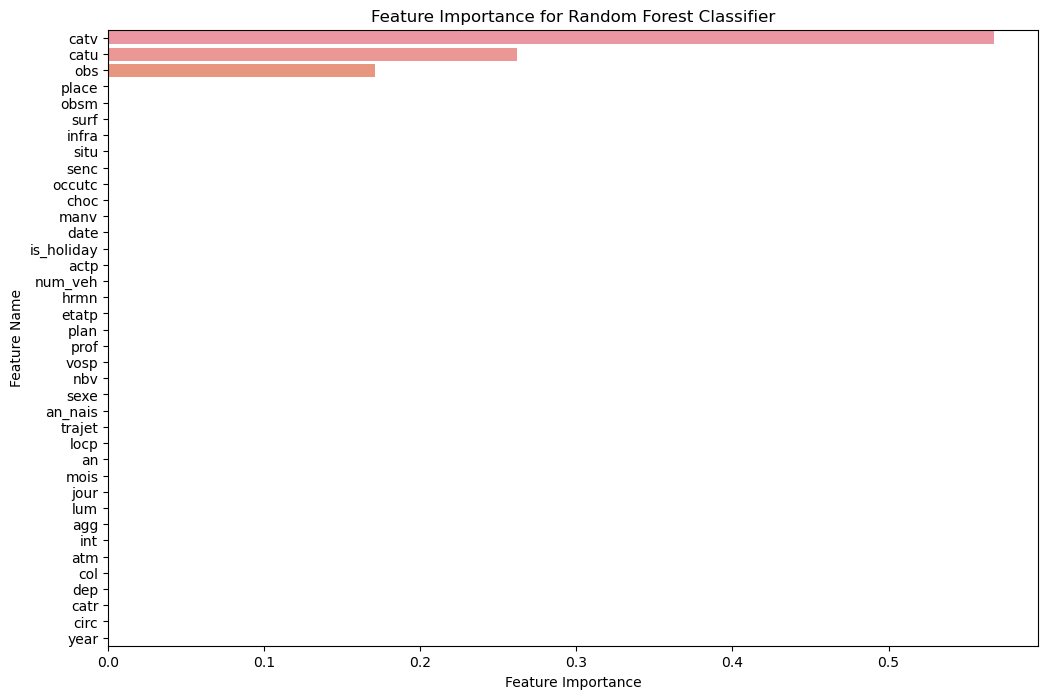

In [29]:
# estimate the feature impotance for thi model
import numpy as np

# Access feature importances from the trained model
importances = tree.feature_importances_

feature_names = df_dt.drop(columns=['Severe']).columns.tolist()

# Check the lengths of feature_names and importances
print("Length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()



